<a href="https://colab.research.google.com/github/liyachittilappilly/MNIST-Handwritten-Digits/blob/main/MNISTDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.pyplot as plt

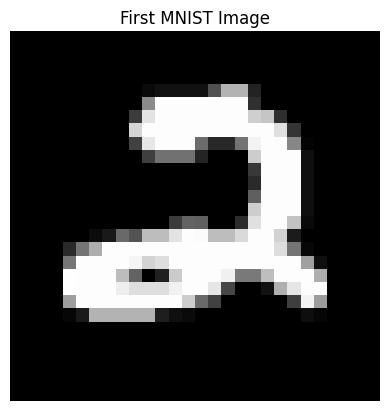

In [ ]:
# Load the data from the file
mnist_data = pd.read_csv("/content/mnist_data.csv")
image = mnist_data.iloc[0].values.reshape(28, 28)
plt.imshow(image, cmap='gray')
plt.title("First MNIST Image")
plt.axis('off')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
# building K-Means model with 10 clusters
# Drop rows that contain any NaN values
mnist_clean = mnist_data.dropna()

# Fit the KMeans model on the cleaned data
model = KMeans(n_clusters=10, random_state=42)
model.fit(mnist_clean)

# Print the unique cluster labels
print("Unique cluster labels:", np.unique(model.labels_))

Unique cluster labels: [0 1 2 3 4 5 6 7 8 9]


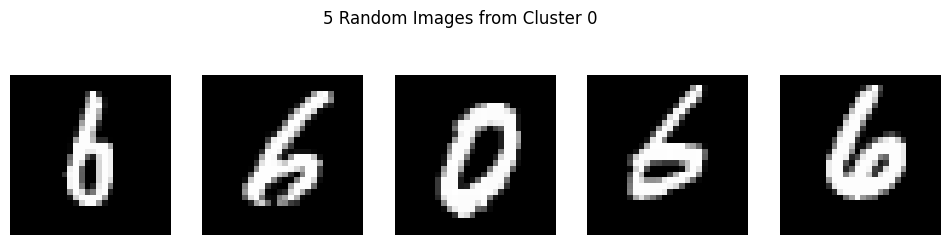

In [ ]:
# Filter cluster 0 from the cleaned data
cluster0 = mnist_clean[model.labels_ == 0]

# Pick 5 random images from cluster 0
random_indices = np.random.randint(0, cluster0.shape[0], size=5)
cluster0_imgs = cluster0.iloc[random_indices]

# Plot 5 random images from cluster 0
plt.figure(figsize=(12, 3))
for i in range(5):
    img_fig = np.asarray(cluster0_imgs.iloc[i]).reshape(28, 28)
    plt.subplot(1, 5, i + 1)
    plt.imshow(img_fig, cmap='gray')
    plt.axis('off')
plt.suptitle("5 Random Images from Cluster 0")
plt.show()


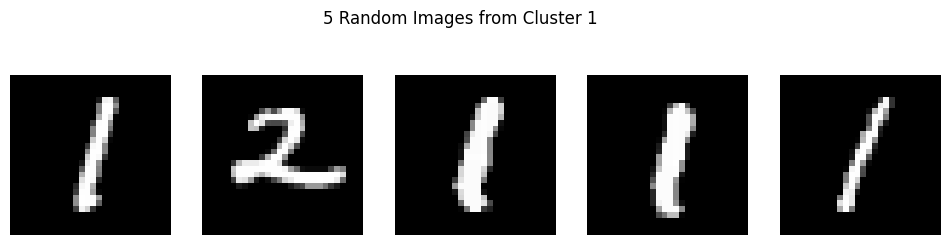

In [ ]:
# Use the same clean dataset that was used for training
cluster1 = mnist_clean[model.labels_ == 1]  # ✅ Now it's Cluster 1

# Pick 5 random images from cluster 1
random_indices = np.random.randint(0, cluster1.shape[0], size=5)
cluster1_imgs = cluster1.iloc[random_indices]

# Plot the 5 random images from cluster 1
plt.figure(figsize=(12, 3))
for i in range(5):
    img_fig = np.asarray(cluster1_imgs.iloc[i]).reshape(28, 28)
    plt.subplot(1, 5, i + 1)
    plt.imshow(img_fig, cmap='gray')
    plt.axis('off')

plt.suptitle("5 Random Images from Cluster 1")
plt.show()


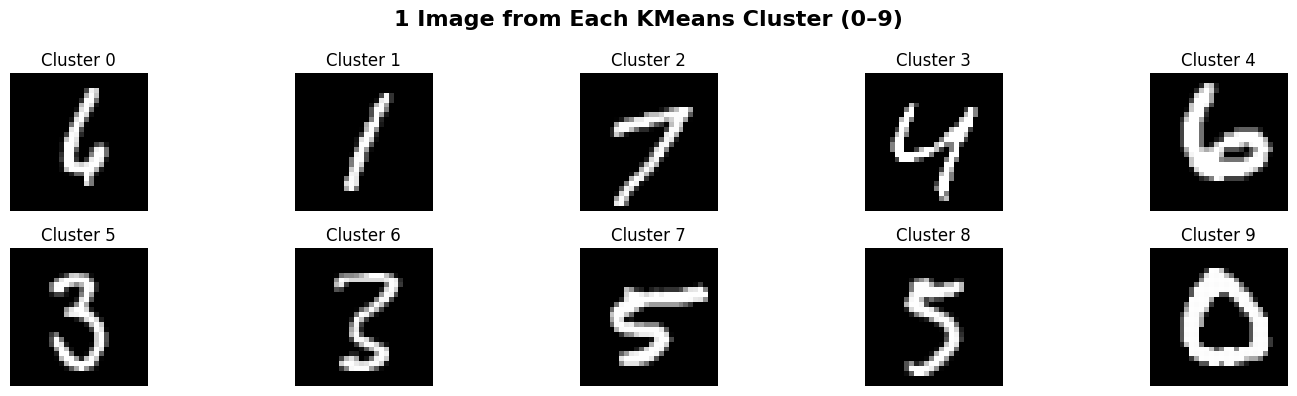

In [ ]:
plt.figure(figsize=(15, 4))

for cluster_num in range(10):
    # Get all images in the current cluster
    cluster_images = mnist_clean[model.labels_ == cluster_num]

    # Pick one random image from this cluster
    random_index = np.random.randint(0, cluster_images.shape[0])
    image = np.asarray(cluster_images.iloc[random_index]).reshape(28, 28)

    # Plot it
    plt.subplot(2, 5, cluster_num + 1)
    plt.imshow(image, cmap='gray')
    plt.title(f"Cluster {cluster_num}")
    plt.axis('off')

plt.suptitle("1 Image from Each KMeans Cluster (0–9)", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


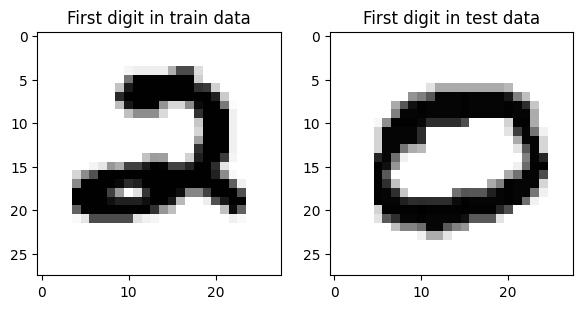

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset (assumed to be only pixel values, no labels)
mnist_data = pd.read_csv("/content/mnist_data.csv")

# Get the first image from train and test (same source here)
train_data_digit1 = np.asarray(mnist_data.iloc[0]).reshape(28, 28)
test_data_digit1 = np.asarray(mnist_data.iloc[1]).reshape(28, 28)  # just picking the next image

# Plot side-by-side
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plt.imshow(train_data_digit1, cmap=plt.cm.gray_r)
plt.title("First digit in train data")

plt.subplot(1, 2, 2)
plt.imshow(test_data_digit1, cmap=plt.cm.gray_r)
plt.title("First digit in test data")

plt.tight_layout()
plt.show()


In [ ]:
# Train data contains digit data and the correct labels
# Test data contains just the digit data and no labels
mnist_train = pd.read_csv("/content/mnist_data.csv")
mnist_test = pd.read_csv("/content/mnist_data.csv")
# Let's visualize the image represented by the first rows of the train data and the test data
train_data_digit1 = np.asarray(mnist_train.iloc[0:1,1:]).reshape(28,28)
test_data_digit1 = np.asarray(mnist_test.iloc[0:1,]).reshape(28,28)
plt.subplot(1,2,1)
plt.imshow(train_data_digit1,cmap = plt.cm.gray_r)
plt.title("First digit in train data")
plt.subplot(1,2,2)
plt.imshow(test_data_digit1,cmap = plt.cm.gray_r)
plt.title("First digit in test data ")


ValueError: cannot reshape array of size 783 into shape (28,28)

In [ ]:
# Train data contains digit data and the correct labels
# Test data contains just the digit data and no labels
mnist_train = pd.read_csv("datasets/mnist/train.csv")
mnist_test = pd.read_csv("datasets/mnist/test.csv")
# Let's visualize the image represented by the first rows of the train data and the test data
train_data_digit1 = np.asarray(mnist_train.iloc[0:1,1:]).reshape(28,28)
test_data_digit1 = np.asarray(mnist_test.iloc[0:1,]).reshape(28,28)
plt.subplot(1,2,1)
plt.imshow(train_data_digit1,cmap = plt.cm.gray_r)
plt.title("First digit in train data")
plt.subplot(1,2,2)
plt.imshow(test_data_digit1,cmap = plt.cm.gray_r)
plt.title("First digit in test data ")


In [ ]:
"""Let us now assign the label column value to a new variable Y_train
and the remaining column values to X_train"""
X_train = mnist_train.iloc[:,1:]
Y_train = mnist_train.iloc[:,0:1]


NameError: name 'mnist_train' is not defined

In [ ]:
"""Let us now assign the label column value to a new variable Y_train
and the remaining column values to X_train"""
X_train = mnist_train.iloc[:,1:]
Y_train = mnist_train.iloc[:,0:1]


In [ ]:
from sklearn.neural_network import MLPClassifier
# Let us now create a neural network model to learn from train data
# We shall build a single hidden layer with 50 nodes.
nn_model = MLPClassifier(hidden_layer_sizes=(50))
# The fit method initiates the learning process. When its execution completes, the model is learnt
nn_model.fit(X_train,mnist_train.iloc[:,0])
# Now that we have a model, lets get it to predict the value of the first digit in the test data
print(nn_model.predict(mnist_test.iloc[0:1,]))
# output
# [2]


In [ ]:
from sklearn.metrics import classification_report
# report based on tain data
print(classification_report(Y_train,predicted_digit))
